In [63]:
# 载入需要用到的包和数据
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
from fashion import mnist_reader

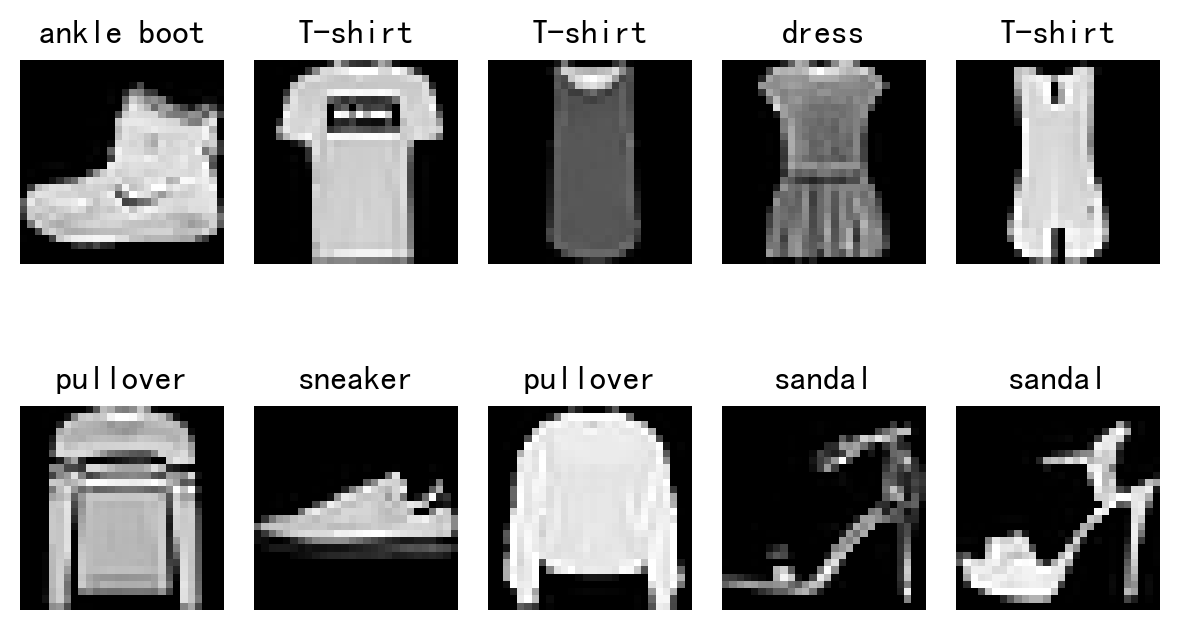

In [64]:
# 读取数据
x_fashion_train, y_fashion_train = mnist_reader.load_mnist('./DataSets/fashion', kind='train')
x_fashion_test, y_fashion_test = mnist_reader.load_mnist('./DataSets/fashion', kind='t10k')
text_labels = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'skirt', 'sneaker', 'bag', 'ankle boot']

# 创建画布
fig = plt.figure(figsize=(6,4))
# 设置列数
columns = 5
# 设置行数
rows = 2
# 循环绘制图片
for i in range(1, columns*rows+1):
    # 添加子图
    fig.add_subplot(rows,columns,i)
    # 绘制图片
    plt.imshow(x_fashion_train[i-1].reshape((28,28)),cmap="gray")
    # 设置标题
    plt.title(text_labels[y_fashion_train[i-1]])
    # 关闭坐标轴
    plt.axis('off')
# 调整图片布局
plt.tight_layout()
# 显示图片
plt.show()

In [65]:
# 预处理
train_images = x_fashion_train.reshape(-1,28,28,1)/255
train_labels = y_fashion_train
# 打乱顺序
index = np.arange(len(train_images))
np.random.shuffle(index)
# 验证数据
valid_images = train_images[index[-10000:]]
valid_labels = train_labels[index[-10000:]]
# 训练数据
train_images, train_labels = train_images[index[:50000]], train_labels[index[:50000]]
# 测试数据
test_images = x_fashion_test.reshape(len(x_fashion_test),28,28,1)/255
test_labels = y_fashion_test

In [66]:
# 搭建模型
fashion_mnist_cnn_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)), \
                                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)), \
                                             tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), \
                                             tf.keras.layers.MaxPooling2D((2,2)), \
                                             tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), \
                                             tf.keras.layers.MaxPooling2D((2,2)), \
                                             tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), \
                                             tf.keras.layers.MaxPooling2D((2,2)), \
                                             tf.keras.layers.Flatten(), \
                                             tf.keras.layers.Dense(512,activation='relu'), \
                                             tf.keras.layers.Dense(10,activation='softmax')])
fashion_mnist_cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 3, 3, 128)       

In [67]:
# 训练模型
fashion_mnist_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_cnn_history = fashion_mnist_cnn_model.fit(train_images, train_labels, epochs=10, batch_size = 64, validation_data=(valid_images,valid_labels))

Epoch 1/10
782/782 [==============================] - 22s 27ms/step - loss: 0.5189 - accuracy: 0.8071 - val_loss: 0.3597 - val_accuracy: 0.8660
Epoch 2/10
782/782 [==============================] - 21s 26ms/step - loss: 0.3097 - accuracy: 0.8872 - val_loss: 0.3125 - val_accuracy: 0.8866
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.2549 - accuracy: 0.9059 - val_loss: 0.2682 - val_accuracy: 0.9026
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.2203 - accuracy: 0.9187 - val_loss: 0.2645 - val_accuracy: 0.9015
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.1956 - accuracy: 0.9283 - val_loss: 0.2550 - val_accuracy: 0.9065
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.1741 - accuracy: 0.9356 - val_loss: 0.2340 - val_accuracy: 0.9153
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.1518 - accuracy: 0.9434 - val_loss: 0.2353 - val_accuracy:

In [68]:
# 测试模型
fashion_mnist_cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2669 - accuracy: 0.9200


[0.2669013738632202, 0.9200000166893005]

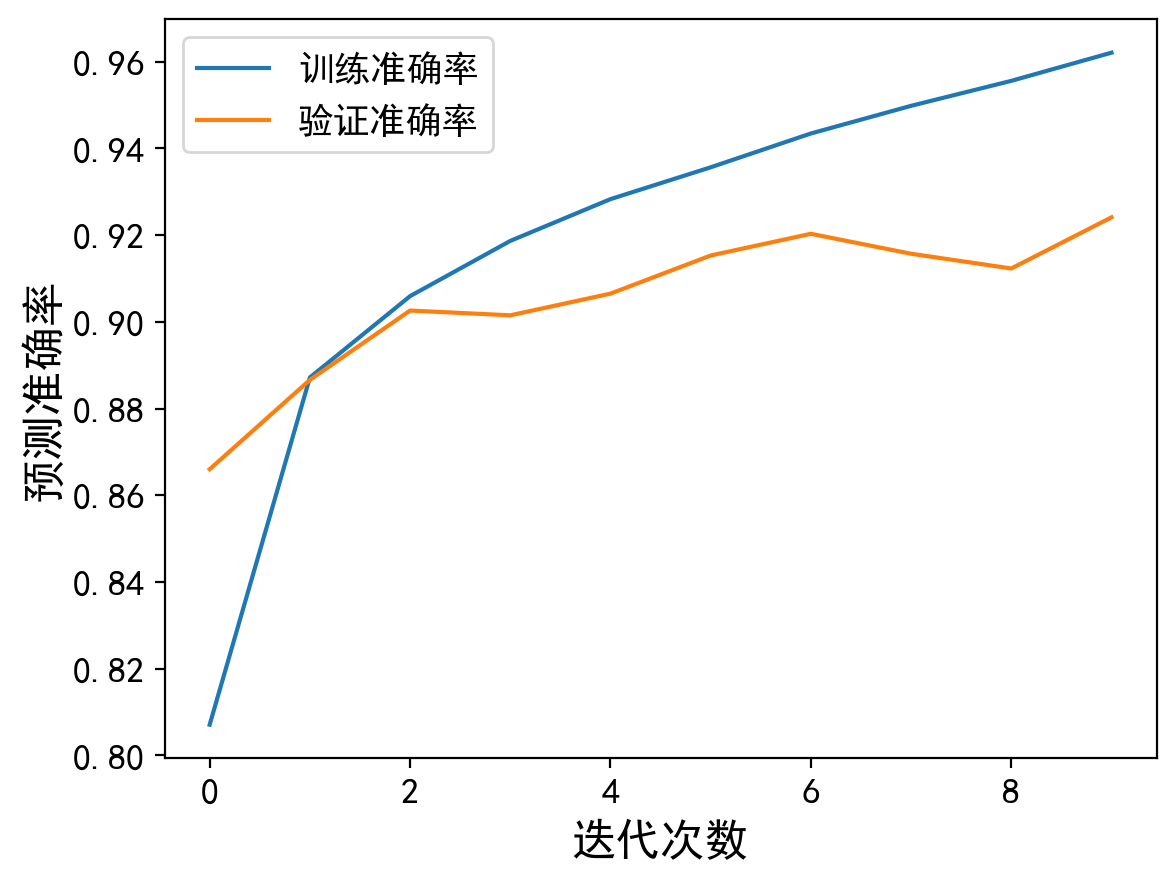

In [69]:
# 可视化
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签

plt.plot(mnist_cnn_history.epoch, mnist_cnn_history.history['accuracy'], label="训练准确率")
plt.plot(mnist_cnn_history.epoch, mnist_cnn_history.history['val_accuracy'], label="验证准确率")

plt.xlabel("迭代次数",fontsize=16)
plt.ylabel("预测准确率",fontsize=16)
_ = plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

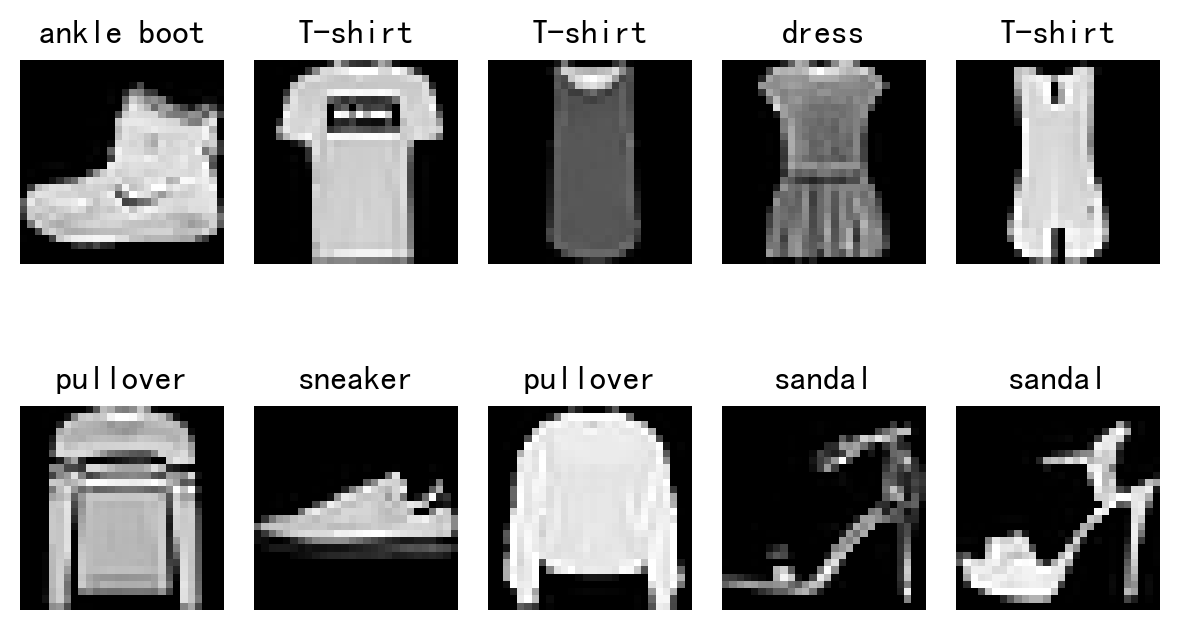

In [70]:
# 创建一个6x4的图形
fig = plt.figure(figsize=(6,4))
# 定义列数和行数
columns = 5
rows = 2
# 遍历每一行
for i in range(1, columns*rows+1):
    # 添加子图
    fig.add_subplot(rows,columns,i)
    # 绘制图像，并设置灰度图
    plt.imshow(x_fashion_train[i-1].reshape((28,28)),cmap="gray")
    # 设置标题
    plt.title(text_labels[y_fashion_train[i-1]])
    # 关闭坐标轴
    plt.axis('off')
# 调整布局
plt.tight_layout()
# 显示图形
plt.show()

313/313 [==============================] - 2s 5ms/step


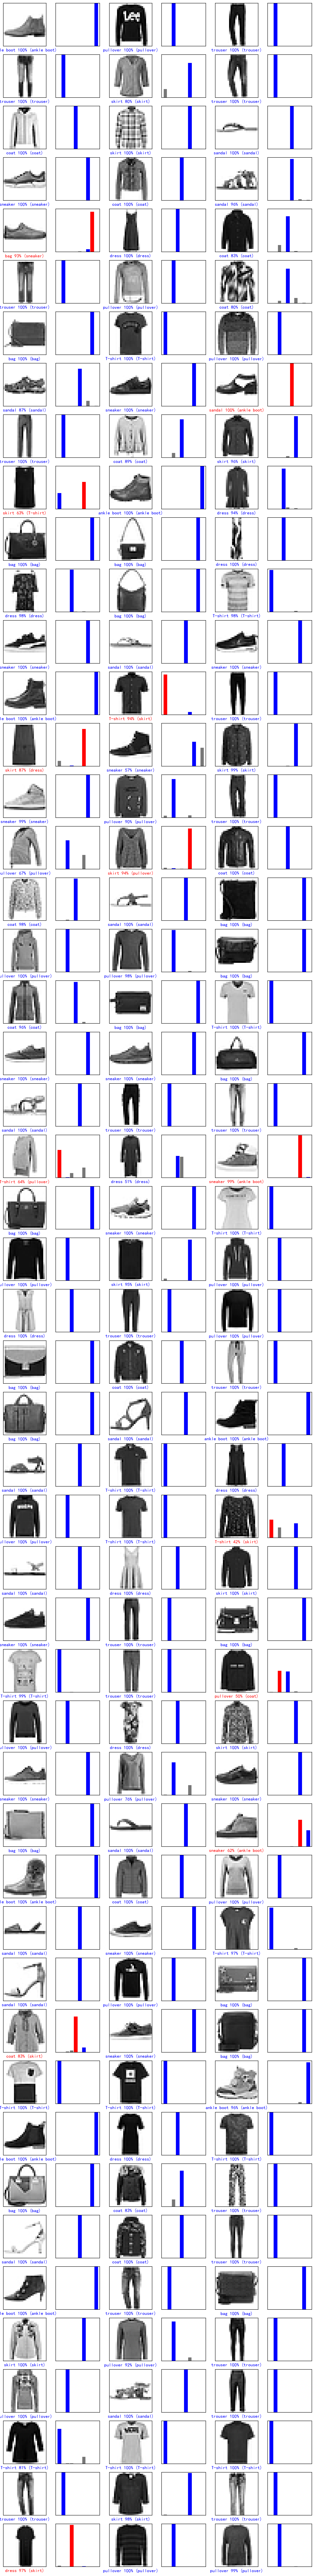

In [74]:
predictions = fashion_mnist_cnn_model.predict(test_images)
predictions.shape


def plot_image(i, predictions_array, true_label, img):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    # 获取图片
    img =img[i]
    
    # 设置图片的网格
    plt.grid(False)
    # 设置x轴标签
    plt.xticks([])
    # 设置y轴标签
    plt.yticks([])
    
    # 显示图片
    plt.imshow(img, cmap=plt.cm.binary)
    
    # 获取预测标签
    predicted_label = np.argmax(predictions_array)
    # 判断预测标签是否正确
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    # 设置图片标签
    plt.xlabel("{} {:2.0f}% ({})".format(text_labels[predicted_label],100*np.max(predictions_array),text_labels[true_label]), color=color)
    
    
def plot_value_array(i,predictions_array, true_label):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    
    # 设置图片的网格
    plt.grid(False)
    # 设置x轴标签
    plt.xticks([])
    # 设置y轴标签
    plt.yticks([])
    # 绘制柱状图
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    
    # 设置y轴范围
    plt.ylim([0,1])
    # 获取预测标签
    predicted_label = np.argmax(predictions_array)
    
    # 设置柱状图颜色
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

# 设置图片行数
num_rows = 50
# 设置图片列数
num_cols = 3
# 设置图片数量
num_images = num_rows*num_cols
# 设置图片大小
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# 循环绘制图片
for i in range(num_images):
    # 绘制图片
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    # 绘制柱状图
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
# 显示图片
plt.show()